# Modelado Bayesiano
Alguna vez te has imaginado cómo le hace nuestra cabeza para tomar decisiones sin enloquecer? Cómo nos adaptamos a nuevos ambientes o aprendemos algo que nunca antes habíamos visto?

Considerar que el cerebro trabaja a partir de inferencias, y por tanto de probabilidades, nos permite crear una maquinaria en donde tomamos en cuenta tanto los estímulos de nuestro ambiente como nuestro conocimiento del mundo, todo esto con un grado de incertidumbre variable. Dicha incertidumbre se crea a apartir del ruido de nuestras entradas sensoriales y nuestras entradas nemotécnicas (incluso cambios en nuestras redes neuronales tienen peso en el ruido).

## 1. Teorema de Bayes
Con la probabilidad Bayesiana podemos INFERIR sucesos a partir de nuestro conocimiento previo. Nos perite, además, lidiar con la incertidumbre causada por muchas fuentes de información.
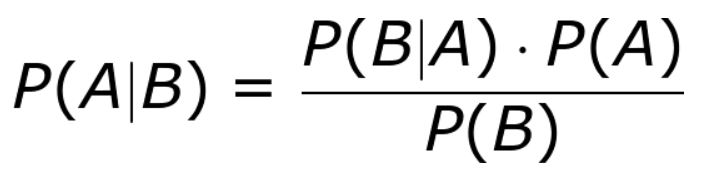




## 2. Pensamiento Bayesiano
Los modelos cognitivos bayesiamos están motivados por la idea de que el cerebro aproxima estadísticamente la solución a una tarea a partir de lo que sensa, su conocimiento previo y las características del entorno.
1. Observaciones (obs): Nos permite conocer nuestro entorno a partir de nuestros sentidos (visión, audición, propiocepción, ritmo cardíaco, etc).

2. Modelo: Característica a suponer (estado de ánimo, localización, clima, etc).
 
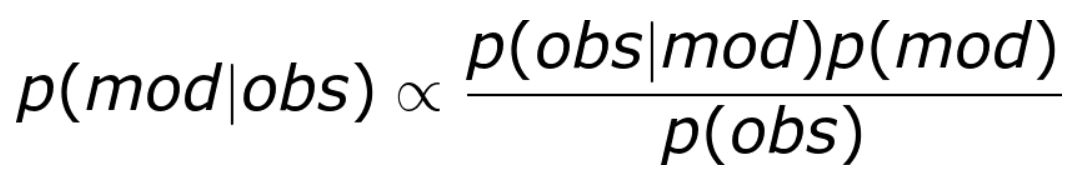

En donde:
1. p(mod | obs) ---> Hipótesis (suposición final)
2. p(obs | mod) ---> Likelihood (lo que esperamos sensar dado el ambiente)
3. p(mod)       ---> Bias (creencias previas)
4. p(obs)       ---> Marginal (todas las probabilidades del modelo)
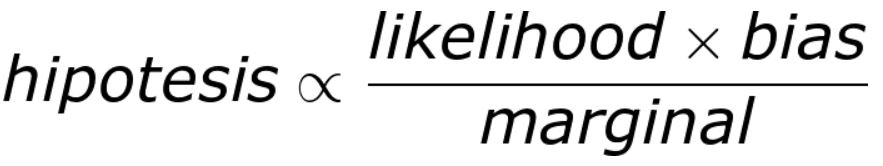

### 2.1 No me dejan dormir
Pensemos en un ejemplo desagradable: cuando un mosquito no nos deja dormir y tendremos que levantarnos a matarlo. Modelemos nuestras variables:

1. Observaciones: visual (v) y auditiva (a)
2. Modelo: Localización del mosquito (loc)
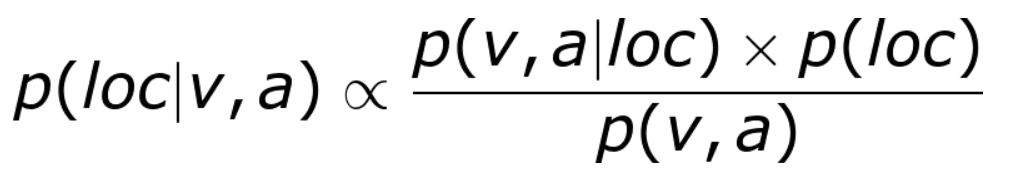

## 3. Simulando los sentidos
Usemos Arduino para simular nuestros sentidos: el sensor KY-028 serán nuestros oídos y el sensor LDR nuestros ojos.

In [2]:
# Leer el puerto Serial

# Biblioteca que nos permite leer los puertos COM
import serial
import time
# Abrimos el puerto del Arduino a 9600 baudios
PuertoSerie = serial.Serial(port="COM6", baudrate=9600)
vision=[]
t1=time.time() #segundos
state=True
while state==True:
    # Leemos hasta que encontarmos el final de línea
    Arduino = PuertoSerie.readline()
    Arduino= Arduino.decode("utf-8").replace("\r\n","")
    vision.append(int(Arduino))
    t2=time.time() #segundos
    if t2-t1>=3:
        state=False
PuertoSerie.close()
print(vision)

[21, 22, 21, 21, 22, 21, 22, 22, 22, 21, 21, 21, 21, 21, 21, 22, 22, 22, 21, 21, 22, 22, 22, 22, 21, 22, 22, 22, 21, 21, 22, 21, 21, 21, 21, 22, 21, 21, 21, 22, 21, 21, 21, 21, 21, 21, 21, 21, 22, 21, 22, 21, 21, 21, 22, 21, 22, 20, 22, 22, 22, 22, 21, 22, 21, 21, 21, 22, 22, 22, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 21, 22, 21, 21, 22, 21, 22, 22, 22, 21, 22, 22, 21, 21, 23, 21, 21, 21, 21, 21, 22, 21, 21, 21, 21, 21, 22, 22, 22, 22, 21, 21, 22, 21, 22, 22, 22, 22, 22, 22, 21, 22, 21, 21, 22, 22, 22, 22, 22, 21, 22, 21, 22, 22, 21, 22, 22, 22, 23, 21, 22, 22, 21, 22, 22, 21, 21, 21, 21, 22, 21, 22, 21, 22, 22, 22, 22, 22, 21, 22, 22, 22, 22, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 21, 22, 22, 21, 21, 22, 21, 22, 23, 21, 21, 22, 21, 22, 22, 22, 21, 22, 22, 22, 22, 21, 22, 22, 21, 22, 22, 21, 21, 22, 21, 21, 22, 21, 22, 21, 22, 22, 21, 21, 22, 22, 22, 22, 21, 22, 21, 21, 22, 21, 21, 22, 21, 23, 21, 21, 22, 22, 21, 22, 23, 21, 21, 22, 21, 22, 21, 22, 22, 22, 21, 22, 22, 21, 22, 22,

## 4. Función de densidad de probabilidad 
Las PDF utilizadas en los sistemas bayesianos representan la incertidumbre del observador sobre una cantidad, aunque esa cantidad tenga un único valor verdadero (O´Reilly, et. al, 2012). Las PDF representan tanto la estimación general (promedio) de la cantidad en sí como la confianza en esa estimación (basada en el conocimiento sobre el ruido en el sistema).

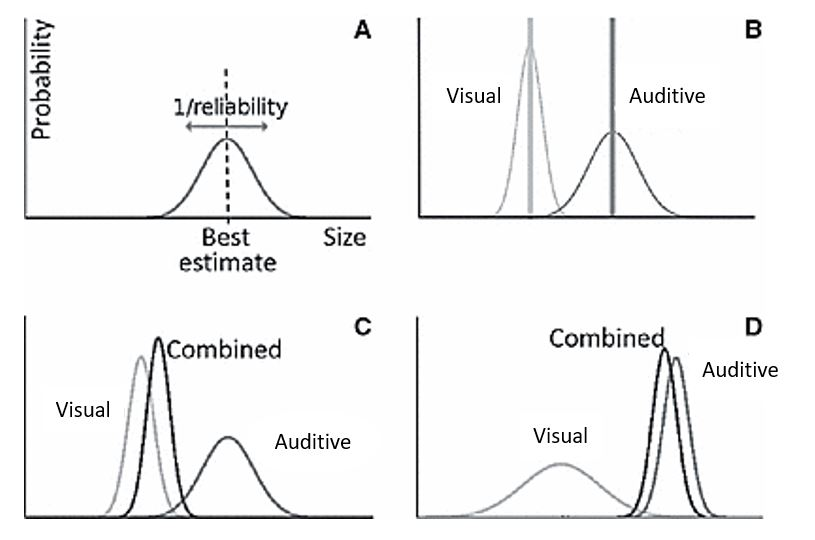

In [3]:
#Obtener PDF 
#params:
    #x=puntos
#outputs:    
    #y= función de densidad de probabilidad (pdf)
import scipy.stats as stats
def pdf(mean,std):
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    return x

## 5. Modelando nuestros sentidos 
Leeremos desde el puerto serial los valores obtenidos por los sensores, tratando de imitar el sonido del mosquito que escuchamos y su imagen a partir de la visión.

In [4]:
#Generador de datos random (usar en caso de no tener sensor)
import random
def rand_vec(start,end,leng):
    x=[]
    for n in range(leng):
        xi= random.randrange(start*10,end*10)
        x.append(xi/10)
    return x

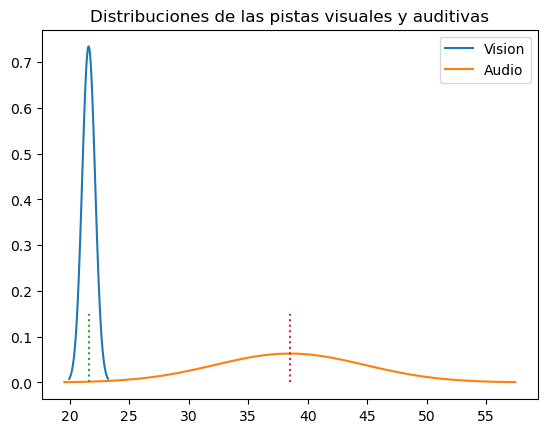

21.57875457875458,0.5432124516312564
38.4975,6.318808728708285


In [8]:
import numpy as np
import matplotlib.pyplot as plt 
v=vision
#v= rand_vec(25,35,200)#datos visuales
a= rand_vec(29,50,200)#datos auditivos
v.sort()#los acomodamos de menor a mayor
a.sort()

mean_v=np.mean(v)#Media o promedio
mean_a=np.mean(a)

std_v=np.std(v)# Desviación estándar
std_a=np.std(a)
#std_a=std_v # Ejemplo1

pdf_v=pdf(mean_v,std_v)# Calculamos la PDF
pdf_a=pdf(mean_a,std_a)

#Generamos un set de datos para graficar la curva completa
v = np.linspace(mean_v - 3*std_v, mean_v + 3*std_v, 100) 
a = np.linspace(mean_a - 3*std_a, mean_a + 3*std_a, 100)

#Graficación
plt.plot(v, stats.norm.pdf(v, mean_v, std_v),label="Vision")
plt.plot(a, stats.norm.pdf(a, mean_a, std_a),label="Audio")
plt.plot([mean_v,mean_v],[0,0.15],linestyle = 'dotted')
plt.plot([mean_a,mean_a],[0,0.15],linestyle = 'dotted')

plt.title("Distribuciones de las pistas visuales y auditivas")
plt.legend()
plt.show()

print(str(mean_v)+","+str(std_v))
print(str(mean_a)+","+str(std_a))

Para combinar las PDF se utilizará la siguiente lógica (Ernst, et. al., 2002):
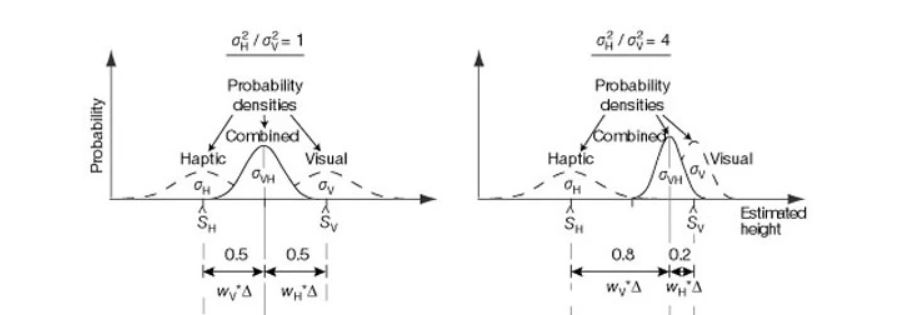

In [9]:
#Función para sumar
def sum_pdf(mean_1,mean_2,std_1,std_2):
    std_suma=np.sqrt((std_1**2*std_2**2)/(std_1**2+std_2**2))
    
    mean_norm=(1/std_1**2)/((1/std_1**2)+(1/std_2**2)) #[0,1]
    mean_t=np.abs(mean_2-mean_1)# Siempre tiene que dar 1
    mean_suma=mean_norm*mean_t #Distancia entre la media combinada y la media 2
    mean_suma=mean_1+mean_suma
    print("sum_pdf")
    print(str(mean_suma)+","+str(std_suma))
    return mean_suma, std_suma

sum_pdf
38.373380689662525,0.5412162259565054


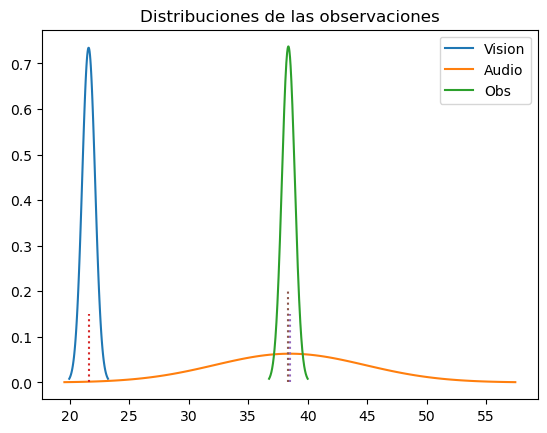

In [10]:
# Suma de PDFs 
mean_obs, std_obs=sum_pdf(mean_v,mean_a,std_v,std_a)
obs = np.linspace(mean_obs - 3*std_obs, mean_obs + 3*std_obs, 200)
plt.plot(v, stats.norm.pdf(v, mean_v, std_v),label="Vision")
plt.plot(a, stats.norm.pdf(a, mean_a, std_a),label="Audio")
plt.plot(obs, stats.norm.pdf(obs, mean_obs, std_obs),label="Obs")
plt.plot([mean_v,mean_v],[0,0.15],linestyle = 'dotted')
plt.plot([mean_a,mean_a],[0,0.15],linestyle = 'dotted')
plt.plot([mean_obs,mean_obs],[0,0.2],linestyle = 'dotted')

plt.legend()
plt.title("Distribuciones de las observaciones")

plt.show()

## 6. Modelando nuestra inferencia 
Ya que tenemos nuestra PDF de las observaciones, el likelihood, ahora debemos agregar nuestra experiencia previa. Para esto, representaremos nuestras memorias y conocimiento previo con valores aleatorios.

25.514,3.141767655317624


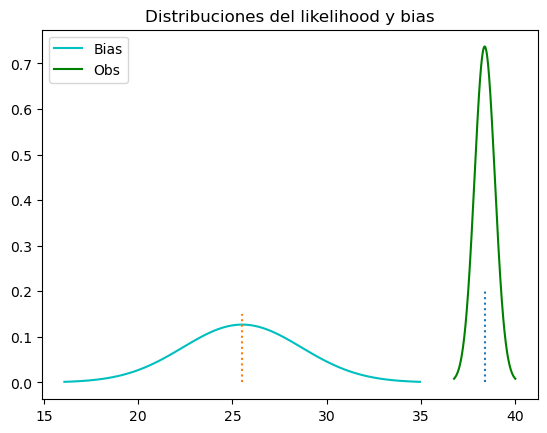

In [11]:
#Obteniendo PDF del bias
bias= rand_vec(20,31,200)#datos visuales
bias.sort()#los acomodamos de menor a mayor
mean_bias=np.mean(bias)
std_bias=np.std(bias)
print(str(mean_bias)+","+str(std_bias))

pdf_bias=pdf(mean_bias,std_bias)
bias = np.linspace(mean_bias - 3*std_bias, mean_bias + 3*std_bias, 100)

plt.plot(bias, stats.norm.pdf(bias, mean_bias, std_bias),"c",label="Bias")
plt.plot(obs, stats.norm.pdf(obs, mean_obs, std_obs),"g",label="Obs")
plt.plot([mean_obs,mean_obs],[0,0.2],linestyle = 'dotted')
plt.plot([mean_bias,mean_bias],[0,0.15],linestyle = 'dotted')
plt.legend()
plt.title("Distribuciones del likelihood y bias")
plt.show()

sum_pdf
25.88460672336878,0.5333602976904931


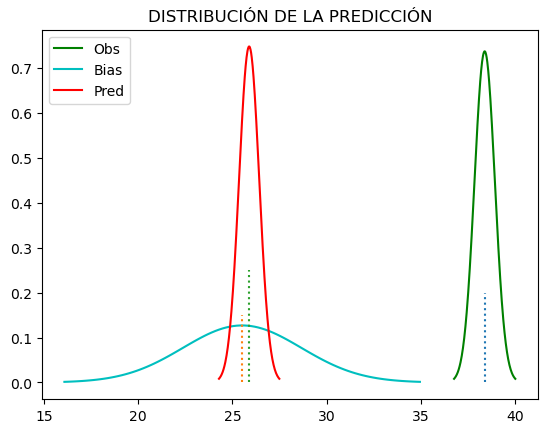

In [12]:
#Obteniendo la PDF combinada entre likelihood y bias 
mean_pred, std_pred=sum_pdf(mean_bias,mean_obs,std_bias,std_obs)
pred = np.linspace(mean_pred - 3*std_pred, mean_pred + 3*std_pred, 200)
plt.plot(obs, stats.norm.pdf(obs, mean_obs, std_obs),"g",label="Obs")
plt.plot(bias, stats.norm.pdf(bias, mean_bias, std_bias),"c",label="Bias")
plt.plot(pred, stats.norm.pdf(pred, mean_pred, std_pred),"r",label="Pred")
plt.plot([mean_obs,mean_obs],[0,0.2],linestyle = 'dotted')
plt.plot([mean_bias,mean_bias],[0,0.15],linestyle = 'dotted')
plt.plot([mean_pred,mean_pred],[0,0.25],linestyle = 'dotted')
plt.legend()
plt.title("DISTRIBUCIÓN DE LA PREDICCIÓN")

plt.show()

# 6. Interpretación
Los sistemas Bayesianos nos enseñan que todos nuestros planes a futuro, es decir, nuestras predicciones, siempre serán influenciadas por nuestro conocimiento previo. Aún si los datos que sensamos tienen baja incertidumbre y nuestro bias sea borroso, este último será muy trascendental.

Durante años se veía a la hipótesis Bayesiana como inviable, ya que no había datos fisiológicos que la respaldaran. No obstante, en años recientes se han publicado investigaciones en donde usando Resonancia Magnética Funcional, encontraron que al momento de hacer identificación de patrones (tonos auditivos, rostros, objetos por categorías), se activan áreas de predicción en el lóbulo frontal.

## 7. Y esto para qué me sirve?
1. Inferencia Activa
2. Aprendizaje a partir de la generalización
3. Cadenas Markovianas
4. Método Monte Carlo

## 7.1 Filtro Gaussiano Jerárquico
Ejemplo de cómo podemos usar la lógica Bayesiana para optimizar procesos (Mathys, et.al.,2014):
Aplicaciones a estudios en esquizofrenia, depresión y límite de la personalidad. (Henco, et. al., 2020)
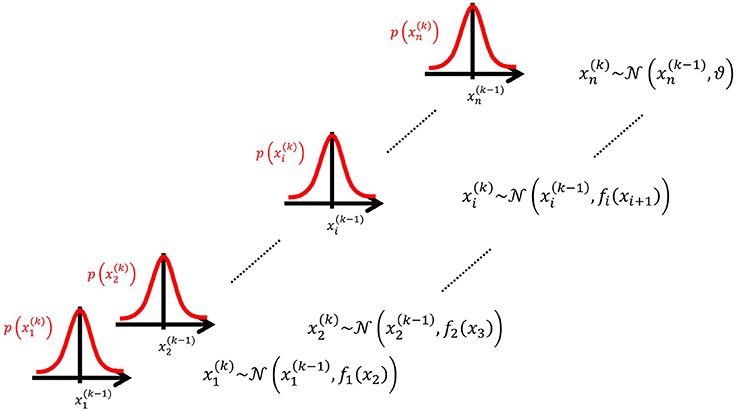

### Referencias:
1. VILARES, Iris; KORDING, Konrad. Bayesian models: the structure of the world, uncertainty, behavior, and the brain. Annals of the New York Academy of Sciences, 2011, vol. 1224, no 1, p. 22-39.
2. Ernst, M. O., & Banks, M. S. (2002). Humans integrate visual and haptic information in a statistically optimal fashion. Nature, 415(6870), 429-433.
3. Función de densidad de probabilidad: O’Reilly, J. X., Jbabdi, S., & Behrens, T. E. (2012). How can a Bayesian approach inform neuroscience?. European Journal of Neuroscience, 35(7), 1169-1179.
4. Mathys, C. D., Lomakina, E. I., Daunizeau, J., Iglesias, S., Brodersen, K. H., Friston, K. J., & Stephan, K. E. (2014). Uncertainty in perception and the Hierarchical Gaussian Filter. Frontiers in human neuroscience, 8, 825.
5. Henco, L., Diaconescu, A. O., Lahnakoski, J. M., Brandi, M. L., Hörmann, S., Hennings, J., ... & Mathys, C. (2020). Aberrant computational mechanisms of social learning and decision-making in schizophrenia and borderline personality disorder. PLoS computational biology, 16(9), e1008162.

# Agradecimiento al Dr. Ryszard Auksztulewicz de la Freie Universität Berlin por enseñarme este tema <3 Lo tqm Dr.